# Exemplo de pairplots

Fonte: [Auto MPG dataset](http://archive.ics.uci.edu/ml/datasets/Auto+MPG)

Os [*pairplots* são recursos interessantes da biblioteca *seaborn*](https://seaborn.pydata.org/generated/seaborn.pairplot.html)  para explorar diversos cruzamentos entre variáveis de uma única vez. Este notebook traz um exemplo

Note que o `pairplot` é um técnica computacionalmente pesada. É inviável usar no servidor quando for situação de prova online.

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import probplot, norm, t
import seaborn as sns
%matplotlib inline

In [53]:
data = pd.read_csv("auto_mpg_sub.csv")

**Dicionário de dados:**


Variável | Descrição
:---:|---:
mpg | consumo em miles per gallon
cylinders | número de cilindros do motor do carro
displacement | deslocamento dos cilindros em polegadas cúbicas
horsepower | potência do veículo (HP)
weight | peso do veículo (libras)
acceleration | aceleração do veículo
model year | ano do modelo
origin | origem - veja abaixo
car name | nome do carro


**Campo  Origin**

A variável *origin* identifica o país de origem de um veículo

Valor | Origem
:---:|:---:
1 | Estados Unidos da América
2 | Europa
3 | Japão



In [20]:
data[data.origin==1].head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [119]:
data.sort_values(by="acceleration", ascending=True).head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,rpp,consumo,rendimento
11,14.0,8,340.0,160,3609,8.0,70,1,plymouth 'cuda 340,0.044334,5.952000,5.952000
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii,0.049861,5.952000,5.952000
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl,0.049351,6.377143,6.377143
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala,0.050528,5.952000,5.952000
115,16.0,8,400.0,230,4278,9.5,73,1,pontiac grand prix,0.053763,6.802286,6.802286


In [6]:
data.origin = data.origin.astype("category")

In [7]:
data.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


In [60]:
data["rpp"] = data.horsepower/data.weight

In [120]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,rpp,consumo,rendimento
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0.037100,7.652571,7.652571
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0.044679,6.377143,6.377143
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0.043655,7.652571,7.652571
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0.043694,6.802286,6.802286
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0.040591,7.227428,7.227428


In [8]:
data.origin.value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

### Pairplot seaborn

In [62]:
colunas = list(data.columns)

Para simplificar, vamos remover as variáveis qualitativas dos dados

In [63]:
colunas

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year',
 'origin',
 'car name',
 'rpp']

In [14]:
colunas.remove("origin")
colunas.remove('car name')

In [15]:
df = data.loc[:, colunas]

In [64]:
x_vars = ['mpg',
 'cylinders',
 'displacement', 'rpp',
 'horsepower',
 'weight',
 'acceleration',
 'model year']

Para o pairplot precisamos indicar todas as variáveis que são explicativas e todas as que são dependentes. Vamos usar **todas** as variáveis nos dois eixos

In [65]:
y_vars = x_vars

*Pairplot* scatter do Seaborn

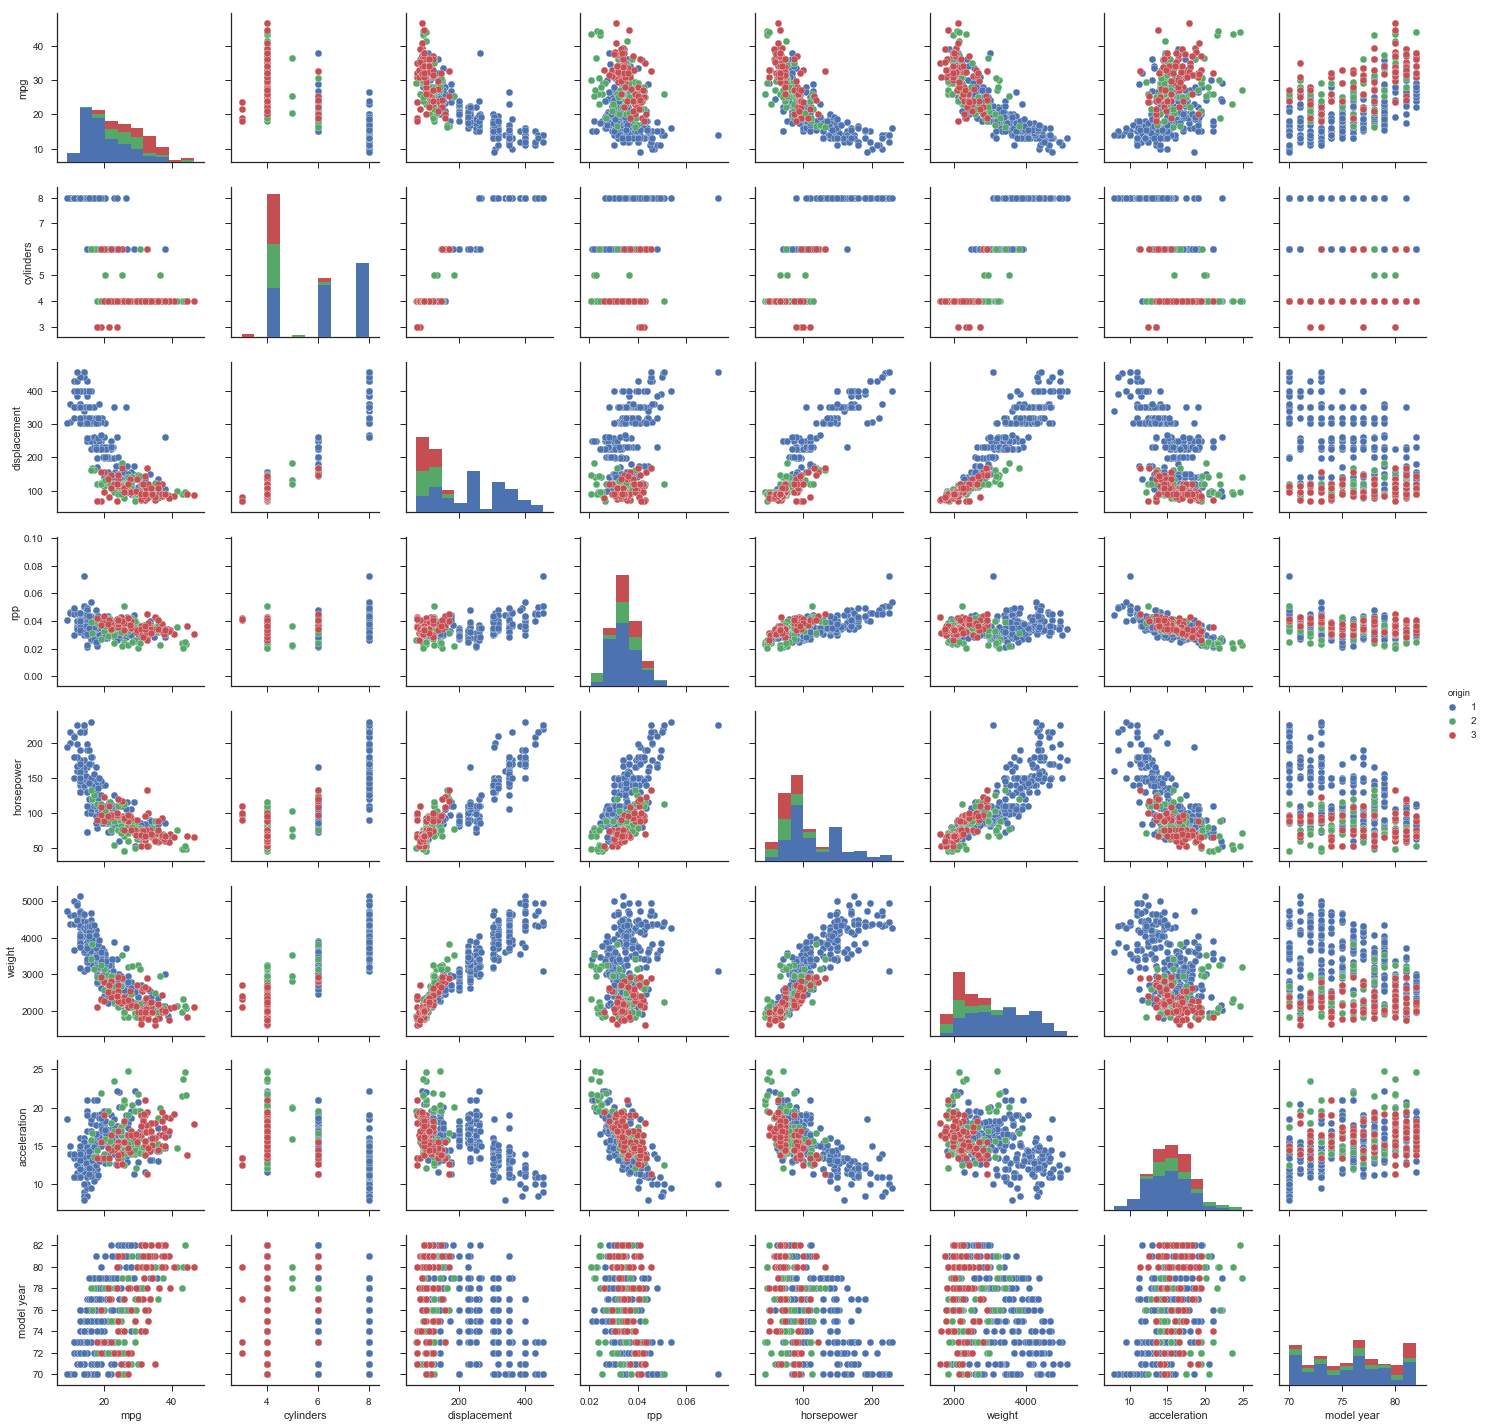

In [66]:
sns.set(style="ticks")

sns.pairplot(data, hue="origin", x_vars=x_vars, y_vars=y_vars)

### Pairplot de regressão

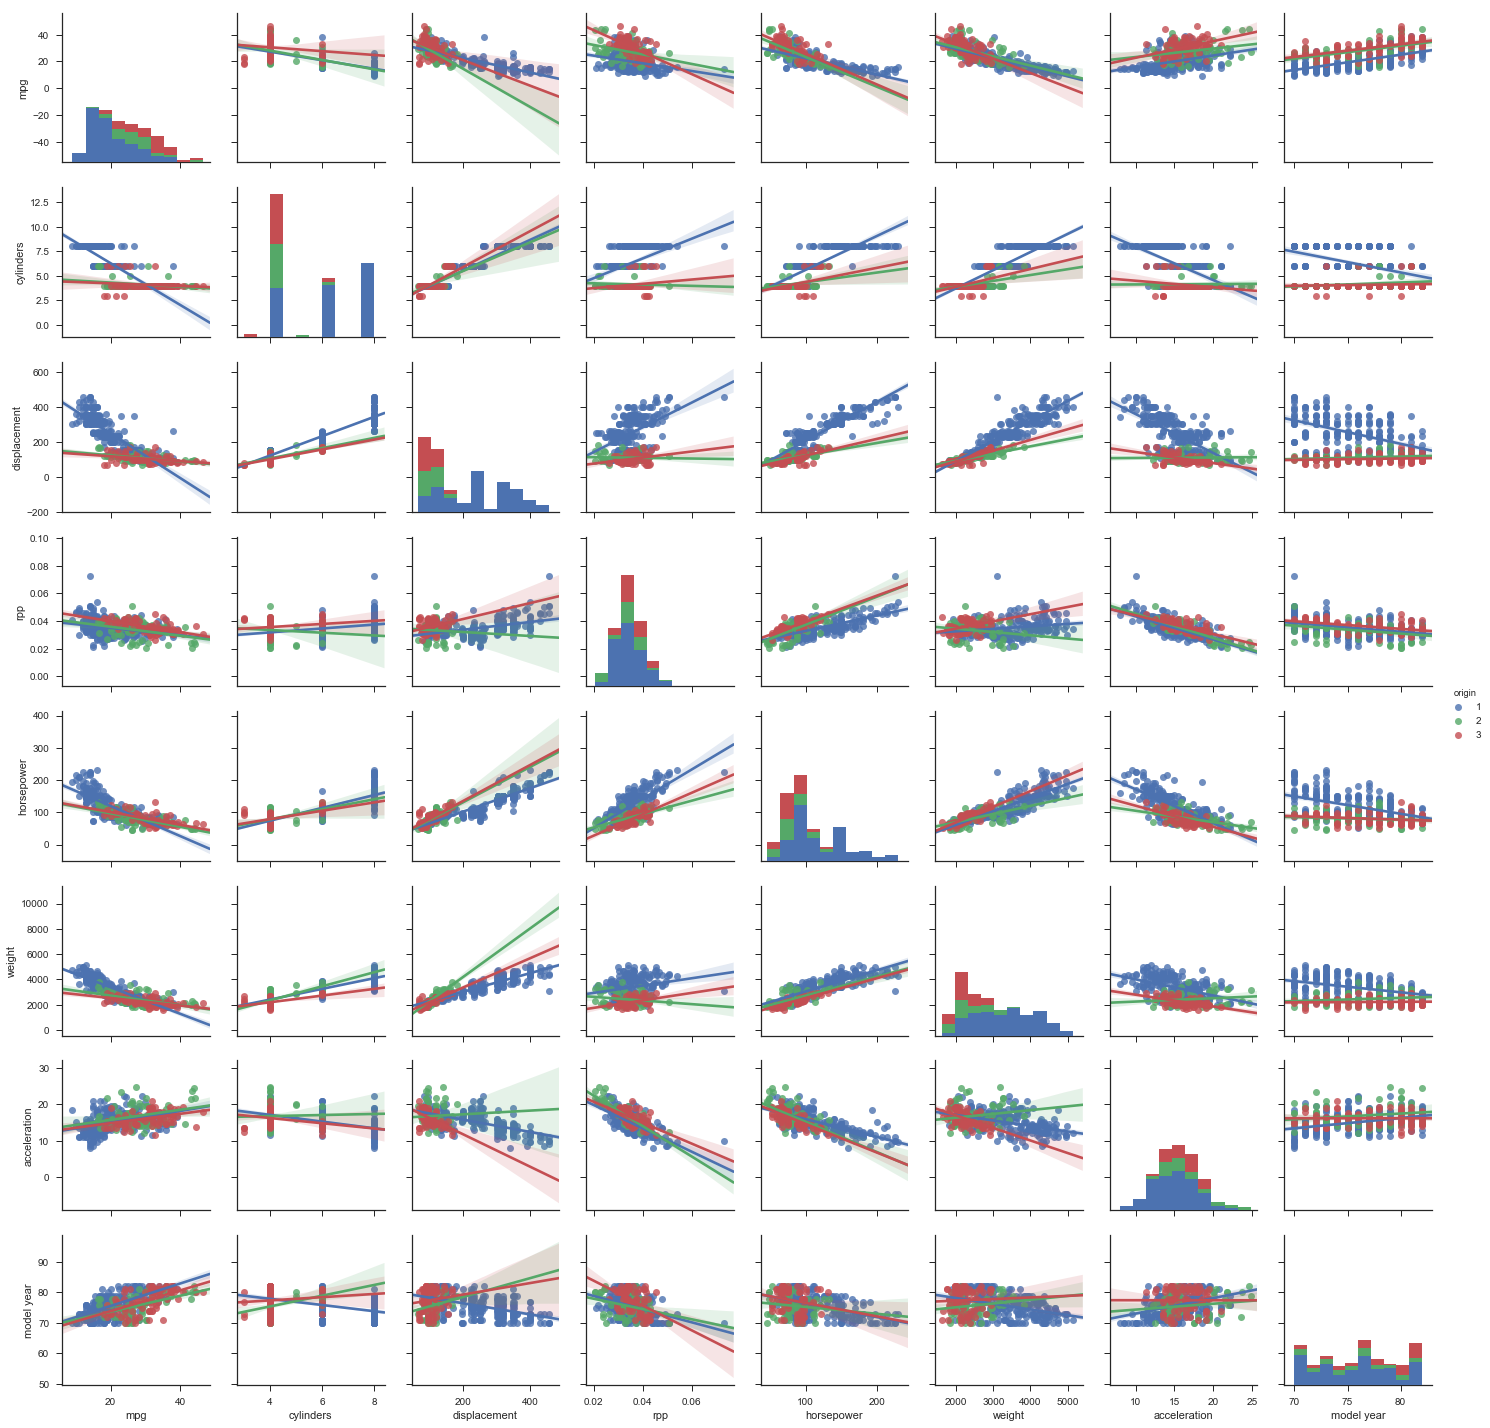

In [67]:
sns.pairplot(data, hue="origin", kind="reg", x_vars=x_vars, y_vars=y_vars)